## Overview


**Objective:**
The goal of this project is to design and implement a movie recommender system that provides personalized recommendations to users based on their preferences and viewing history. The system employs various collaborative and content-based filtering techniques to enhance the accuracy and relevance of movie suggestions.

**Key Components:**

1. **Data Collection:**

   - Utilized a movie dataset containing information about movies, genres, user ratings, and tags.
   - Explored and cleaned the dataset to prepare it for modeling.

2. **Exploratory Data Analysis (EDA):**

   - Analyzed the dataset for sstructure understanding, features, and distributions.
   - Visualized key patterns, such as user preferences and movie popularity, to gain insights.

3. **Content Based Filtering:**

   - Implemented a content-based recommender system using movie genres.
   - Explored the use of TF-IDF vectors to represent movie content and calculate similarities.

4. **Neighborhood Based Collaborative Filtering (KNN):**

   - Implemented a neighborhood-based collaborative filtering model using SciKit Learn's KNN.
   - Explored both user-based and item-based collaborative filtering approaches.
   - Evaluated the model's performance using metrics such as RMSE and MAE.

5. **Model Based Collaborative Filtering (SVD):**

   - Implemented a model-based collaborative filtering approach using the Surprise library and Singular Value Decomposition (SVD).
   - Evaluated the model's performance and explored hyperparameter tuning.

6. **Hybrid Approach:**
   - Recommended a hybrid model that combines the strengths of content-based and collaborative filtering approaches.
   - Highlighted the potential benefits of leveraging both user-item interactions and content features.


Business Understanding:


## Objective:

The primary objective of the recommender system project is to enhance user satisfaction and engagement on the MovieLens platform by delivering personalized and relevant movie recommendations. The recommender system aims to provide users with tailored suggestions based on their historical movie ratings and tagging activities, ultimately improving their overall experience.

Scope:

The project will focus on implementing a collaborative filtering-based recommender system, leveraging the ml-latest-small dataset from MovieLens. The recommendations will be centered around user preferences, ensuring that users discover movies aligned with their tastes and interests. The scope includes both explicit ratings and user-generated tags as valuable indicators of user preferences.

Success Criteria:

The success of the recommender system will be evaluated based on several key performance indicators (KPIs):
## User Engagement:
Increase in the number of user interactions with the platform, including ratings, tags, and time spent on the website.
## Recommendation Accuracy:
Improvement in the precision and relevance of movie recommendations, reducing instances of irrelevant or disliked suggestions.
## User Satisfaction:
Positive feedback from users, measured through surveys, reviews, and user ratings.
## Platform Adoption:
Growth in the number of registered users and active users leveraging the recommendation features.


# Data Understanding:


## Data Source:

The dataset (ml-latest-small) consists of 100,836 ratings and 3,683 tag applications across 9,742 movies. The data were 
generated by 610 users between March 29, 1996, and September 24, 2018.

The data used in this project will be pulled from 4 different separate file:

## 1. Movies Data (movies.csv):

Contains movie information, including titles and genres.

Columns: 

 * movieId: Unique identifier for each movie.
 * title: The title of the movie, which also includes the year of release in parentheses.
 * genres: A pipe-separated list of genres to categorize the movie (e.g., Action|Adventure|Comedy).


 ##### 2. Links Data (links.csv):

Provides identifiers for linking to external movie-related sources (IMDb, TMDb).

Columns:

* movieId: Unique identifier for each movie, consistent with other data files.

* imdbId: Identifier for movies used by IMDb (Internet Movie Database).

* tmdbId: Identifier for movies used by TMDb (The Movie Database).

## 3. Ratings Data (ratings.csv):


Each entry represents a user's rating for a specific movie.

Contains user ratings on a 5-star scale for movies.

Columns: 

* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* rating: User's rating for the movie on a 5-star scale with half-star increments (0.5 to 5.0).
* timestamp: The timestamp when the rating was recorded, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

## 4. Tags Data (tags.csv):

Contains user-generated metadata (tags) about movies.

Columns: 
* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* tag: User-generated metadata describing a movie, typically a single word or short phrase.
* timestamp: The timestamp when the tag was applied, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


In [3]:
## Import Necessary Libraries

import pandas as pd 
import numpy as np

# Datasets
movies = "data/ml-latest-small/movies.csv"
links = "data/ml-latest-small/links.csv"
ratings = "data/ml-latest-small/ratings.csv"
tags = "data/ml-latest-small/tags.csv"

data = {"movies":None, "links": None, "ratings": None, "tags": None}

for key in data.keys():
    data[key] = pd.read_csv(f"data/ml-latest-small/{key}.csv")

# Exploring Dataframes
# Datasets Lengths

In [4]:
print("Length of each dataset:")
for k, v in data.items():
    print(k, ":",len(v))

Length of each dataset:
movies : 9742
links : 9742
ratings : 100836
tags : 3683


# Displaying top 5 componennts of each dataset

In [5]:
data["movies"].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
data["links"].head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
data["tags"].head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [8]:
print("Summary of each dataset:\n")
for k, v in data.items():
    print(k, "\n")
    print(v.info())
    print("="*100, "\n")

Summary of each dataset:

movies 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

links 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None

ratings 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieI

In [9]:
print("Colums of each dataset:\n")
all_columns = []
for k, v in data.items():
    print(k, "\n")
    all_columns += list(v.columns)
    print(list(v.columns))
    print("="*100, "\n")

print("all unique columns", set(all_columns))

Colums of each dataset:

movies 

['movieId', 'title', 'genres']

links 

['movieId', 'imdbId', 'tmdbId']

ratings 

['userId', 'movieId', 'rating', 'timestamp']

tags 

['userId', 'movieId', 'tag', 'timestamp']

all unique columns {'tmdbId', 'movieId', 'rating', 'imdbId', 'timestamp', 'title', 'genres', 'userId', 'tag'}


# Merging Dataframes

In [10]:
# merging movies df and link df using an inner join
movies_df = data["movies"]
links_df = data["links"]

# Using join with movies_df as the left DataFrame
merged_movies_links = movies_df.join(links_df.set_index("movieId"), on="movieId", how="inner")

# Display the shape of the resulting DataFrame
print(merged_movies_links.shape)

(9742, 5)


In [11]:
merged_movies_links.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [12]:
# Left outer join with ratings_df and specify suffixes
merged_data_ratings = merged_movies_links.join(data["ratings"].set_index("movieId"), on="movieId", how="left", lsuffix='_movies_links', rsuffix='_ratings')

# Left outer join with tags_df and specify suffixes
df = merged_data_ratings

# Display the first few rows of the resulting DataFrame
print(f"Final Merged Data has {df.shape[0]} rows and {df.shape[1]} columns:")
df.head()

Final Merged Data has 100854 rows and 8 columns:


,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,9.649827e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,8.474350e+08
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,1.106636e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15.0,2.5,1.510578e+09
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17.0,4.5,1.305696e+09


In [13]:
df[['userId', "movieId"]]

,userId,movieId
0,1.0,1
0,5.0,1
0,7.0,1
0,15.0,1
0,17.0,1
...,...,...
9737,184.0,193581
9738,184.0,193583
9739,184.0,193585
9740,184.0,193587


In [14]:
print(f"The Final dataframe has {df.shape[0]} rows and {df.shape[1]} columns")

The Final dataframe has 100854 rows and 8 columns


# Data Cleaning
# Sorting Out Missing Values

In [15]:
# Checking for missing values in each column
missing_values = df.isna().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"The {column} column has {count} missing values")

The tmdbId column has 13 missing values
The userId column has 18 missing values
The rating column has 18 missing values
The timestamp column has 18 missing values


In [16]:
# Calculating percentage of missing values in each column
missing_percentage = df.isna().mean() * 100

missing_percentage = missing_percentage[missing_percentage > 0]

# A DataFrame with columns and percentage of missing values
missing_table = pd.DataFrame({
    'Columns': missing_percentage.index,
    '% of Missing Values': missing_percentage.values
})
print("Percentage of Missing Values")
missing_table

Percentage of Missing Values


,Columns,% of Missing Values
0,tmdbId,0.012890
1,userId,0.017848
2,rating,0.017848
3,timestamp,0.017848


In [17]:
# dropped all the missing values in tmdbId,userId_x,timestamp_x,userId_y,tag,timestamp_y columns
# 	movieId	title	genres	imdbId	tmdbId	userId	rating	timestamp	userId_tags	tag	timestamp_tags

df.dropna(subset = ['tmdbId', 'userId','timestamp','rating'], inplace=True)

In [18]:
missing_values1 = df.isna().sum()

for column, count in missing_values1.items():
        print(f"The {column} column has {count} missing values")

The movieId column has 0 missing values
The title column has 0 missing values
The genres column has 0 missing values
The imdbId column has 0 missing values
The tmdbId column has 0 missing values
The userId column has 0 missing values
The rating column has 0 missing values
The timestamp column has 0 missing values


# Handling Duplicate Values

In [19]:
duplicated_rows = df.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 0 duplicated rows.


# Confirming Datatypes

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100823 entries, 0 to 9741
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   title      100823 non-null  object 
 2   genres     100823 non-null  object 
 3   imdbId     100823 non-null  int64  
 4   tmdbId     100823 non-null  float64
 5   userId     100823 non-null  float64
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 6.9+ MB


In [21]:
# Converting user IDs and tmdbId to object data type
df[['userId', 'tmdbId']] = df[['userId', 'tmdbId']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100823 entries, 0 to 9741
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   title      100823 non-null  object 
 2   genres     100823 non-null  object 
 3   imdbId     100823 non-null  int64  
 4   tmdbId     100823 non-null  object 
 5   userId     100823 non-null  object 
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


# Handling Outliers

In [22]:
# Outliers in Rating Column
df.value_counts(['rating'])

rating
4.0       26816
3.0       20044
5.0       13209
3.5       13134
4.5        8551
2.0        7550
2.5        5550
1.0        2811
1.5        1791
0.5        1367
dtype: int64

In [23]:
import plotly.express as px

# a box plot to visualize outliers in rating column 
fig = px.box(df, y='rating', title='Box Plot of Rating Outliers')

fig.update_layout(
    title=dict(text='Box Plot of Rating with Outliers', x=0.5, y=0.95), 
)

fig.show()

max_rating = df['rating'].max()
min_rating = df['rating'].min()
print(f"The maximum rating is {max_rating}")
print(f"The minimum rating is {min_rating}")

The maximum rating is 5.0
The minimum rating is 0.5


## Exploratory Data Analysis

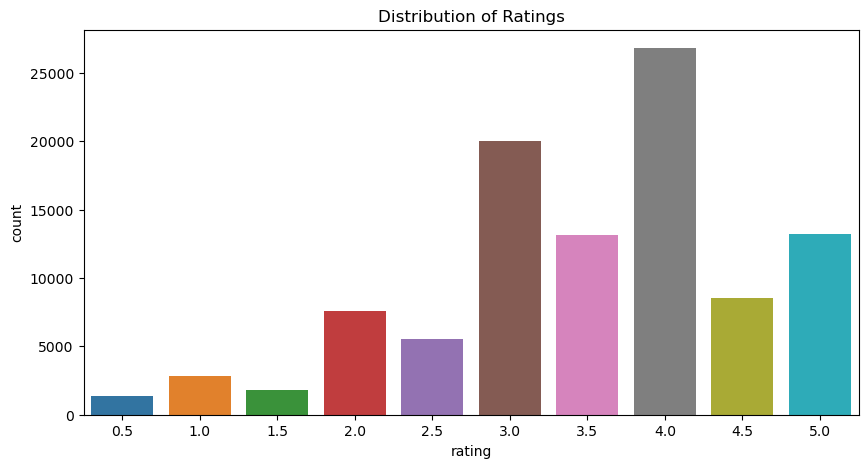

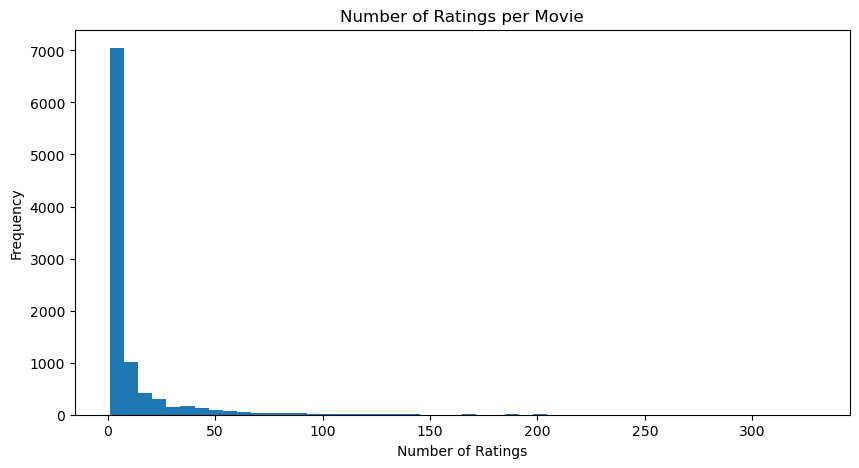

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

# Number of ratings per movie
ratings_per_movie = df.groupby('movieId')['rating'].count().reset_index()
plt.figure(figsize=(10, 5))
plt.hist(ratings_per_movie['rating'], bins=50)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

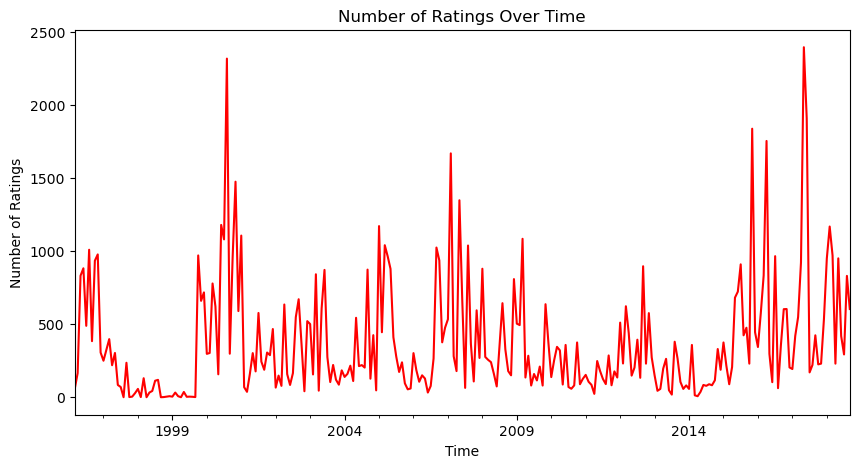

In [29]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

ratings = data["ratings"]

# Convert timestamp to datetime
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Plot the number of ratings over time
plt.figure(figsize=(10, 5))
ratings.set_index('timestamp').resample('M').size().plot(color='red')  # Set line color to red
plt.title('Number of Ratings Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Ratings')
plt.show()
